## Import library

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from google.colab import files

# **Nouvelle section**

## Import Data

In [ ]:
import zipfile
import os

In [ ]:
!unzip "/content/image.zip"
base_dir=r"/content/image"

Archive:  /content/image.zip
   creating: image/
   creating: image/angry/
  inflating: image/angry/0_R3hp9FQvNdqP8qaG.jpg  
  inflating: image/angry/1655043603_1-papik-pro-p-drawing-of-a-child-at-war-1.jpg  
  inflating: image/angry/3021cc31ca0ee35eecc00d14eead5175.jpg  
  inflating: image/angry/3151525500000578-3451517-image-a-10_1455734074794.jpg  
  inflating: image/angry/4720f7fb6a5c850c7f5f73a61b1879f4.jpg  
  inflating: image/angry/4bd89cecab5455ab9f6071fff5636d32--syrian-children-art-therapy.jpg  
  inflating: image/angry/628c737c26ed98bffa5ebb34af40ee0d.jpg  
  inflating: image/angry/6a00d8341d86ee53ef00e54f4a65478834-800wi.jpg  
  inflating: image/angry/6a00d8341d86ee53ef00e5508fbca38833-800wi.jpg  
  inflating: image/angry/6a00d8341d86ee53ef01b8d0648b4a970c.jpg  
  inflating: image/angry/750297f9436530e2d0d015dd93f09583.jpg  
  inflating: image/angry/88f2395c.jpg  
  inflating: image/angry/915f3482ce2597d90cdc199cc99097ca--broken-heart-art-online-art.jpg  
  inflating: image

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-22 05:39:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.85MB/s    in 30s     

2021-05-22 05:40:12 (10.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## Preparing data

In [ ]:
import zipfile, os

local ='/content/image.zip'
zip = zipfile.ZipFile(local, 'r')
# zip.extractall('/tmp')
zip.close()

base_dir = '/content/image'

FileNotFoundError: ignored

In [ ]:
os.listdir('/content/image')

['happiness', 'angry', 'depression']

In [ ]:
os.remove('/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'scissors', 'rock']

In [ ]:
data_generator = ImageDataGenerator(rescale= 1./255,
                                    horizontal_flip= True,
                                    vertical_flip= True,
                                    zoom_range= 0.3,
                                    rotation_range= 90,
                                    shear_range= 0.3,
                                    validation_split= 0.4)

train = data_generator.flow_from_directory(base_dir,
                                           class_mode= 'categorical',
                                           batch_size= 64,
                                           target_size= (150, 150),
                                           subset='training')

validation = data_generator.flow_from_directory(base_dir,
                                           class_mode= 'categorical',
                                           batch_size= 64,
                                           target_size= (150, 150),
                                           subset='validation')

Found 87 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


## Create  Custom callbacks

In [ ]:
class Callbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai lebih dari 95%, Training dihentikan!")
      self.model.stop_training = True

callback = Callbacks()

## Build Model

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                    ])


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Fitting model

In [ ]:
history = model.fit(train,
                    epochs= 20,
                    verbose= 1,
                    callbacks=[callback],
                    validation_data=validation)

Epoch 1/20
2/2 [==============================] - 8s 5s/step - loss: 1.6233 - accuracy: 0.3448 - val_loss: 1.1186 - val_accuracy: 0.3214
Epoch 2/20
2/2 [==============================] - 5s 4s/step - loss: 1.1188 - accuracy: 0.3678 - val_loss: 1.1150 - val_accuracy: 0.3393
Epoch 3/20
2/2 [==============================] - 5s 4s/step - loss: 1.0971 - accuracy: 0.3563 - val_loss: 1.0947 - val_accuracy: 0.3393
Epoch 4/20
2/2 [==============================] - 5s 2s/step - loss: 1.0952 - accuracy: 0.3908 - val_loss: 1.0923 - val_accuracy: 0.3393
Epoch 5/20
2/2 [==============================] - 5s 4s/step - loss: 1.0918 - accuracy: 0.3563 - val_loss: 1.0943 - val_accuracy: 0.4107
Epoch 6/20
2/2 [==============================] - 5s 2s/step - loss: 1.0768 - accuracy: 0.4598 - val_loss: 1.0912 - val_accuracy: 0.5357
Epoch 7/20
2/2 [==============================] - 5s 2s/step - loss: 1.0706 - accuracy: 0.5172 - val_loss: 1.0891 - val_accuracy: 0.5179
Epoch 8/20
2/2 [=========================

## Model evaluate

In [ ]:
model.evaluate(validation, verbose=1)

1/1 [==============================] - 1s 1s/step - loss: 0.9889 - accuracy: 0.5179


[0.9889035820960999, 0.5178571343421936]

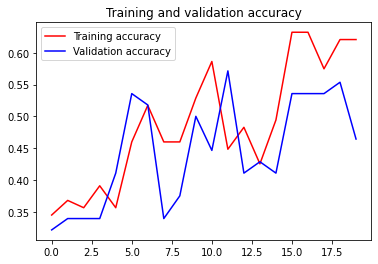

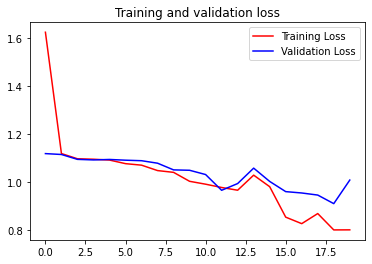

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Predict

In [ ]:
class_names = train.class_indices
print(class_names)

{'angry': 0, 'depression': 1, 'happiness': 2}


In [ ]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

Saving mo7t.png to mo7t.png
1/1 [==============================] - 0s 28ms/step
happiness


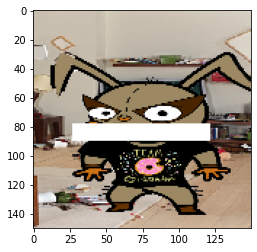

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(150,150, 3))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predict = model.predict(images)
  index = predict[0].argmax()

  for key,value in class_names.items():
    if value == index:
        print(key)
  

In [ ]:
predict

array([[0., 0., 1.]], dtype=float32)

In [ ]:
output = model(images)
output

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0., 0., 1.]], dtype=float32)>